# Instancia de librarias

In [63]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as stats
import statistics


import warnings
warnings.filterwarnings('ignore')


print("Setup complete")

Setup complete


# Importación de datos

In [64]:
path = r'data/Walmart_Store_sales.csv'
wall_data = pd.read_csv(path, header=0, encoding='utf-8')

# Análisis exploratorio

In [65]:
print("Número de observaciones:", wall_data.shape[0])
print("Número de variables:", wall_data.shape[1])
print("Variables",wall_data.keys())

Número de observaciones: 6435
Número de variables: 8
Variables Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [66]:
wall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


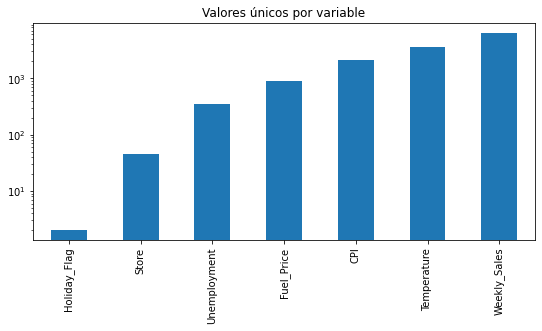

In [67]:
wall_data.value_counts(wall_data.dtypes)
unq_val = wall_data.select_dtypes(include='number').nunique().sort_values()
unq_val.plot.bar(logy=True, figsize=(9,4),title="Valores únicos por variable");


In [68]:
muestra = int(wall_data.shape[0]*.60)
wall_data.sample(10,random_state=muestra)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5306,38,21-05-2010,340497.08,0,76.20,3.120,126.184387,14.099
2441,18,16-04-2010,1135577.62,0,50.26,2.885,131.980900,9.269
5183,37,08-10-2010,524483.65,0,66.34,2.633,210.514440,8.476
897,7,05-11-2010,480512.44,0,49.44,2.729,190.996438,9.137
3194,23,07-01-2011,1122034.48,0,27.81,3.193,132.882323,5.114
4654,33,05-08-2011,242456.39,0,96.93,3.803,129.184645,8.442
3394,24,10-02-2012,1403460.87,1,33.82,3.826,137.166677,8.659
2580,19,19-03-2010,1332940.35,0,43.74,2.960,131.824290,8.350
2681,19,24-02-2012,1352470.09,0,33.91,3.917,137.341103,7.943
4674,33,23-12-2011,256235.19,0,53.39,3.541,129.984548,8.010


In [69]:
wall_data.columns = ["num_tienda","fecha","vta_semana","dia_feriado","temperatura","precio_gasolina_reg","ipc","tasa_desempleo"]

In [70]:
wall_data.head()

,num_tienda,fecha,vta_semana,dia_feriado,temperatura,precio_gasolina_reg,ipc,tasa_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [71]:
# la temperatura esta en °F
print("Max: ",wall_data['temperatura'].max(),"Min: ",wall_data['temperatura'].min())

Max:  100.14 Min:  -2.06


In [72]:
# El precio de la gasolina por region es en galones
print("Max: ",wall_data['precio_gasolina_reg'].max(),"Min: ",wall_data['precio_gasolina_reg'].min())

Max:  4.468 Min:  2.472


In [73]:
# la temperatura se deja en °C
wall_data['temperatura'] = (wall_data['temperatura']-32)*(5/9)
wall_data['temperatura'].head()

0    5.727778
1    3.616667
2    4.405556
3    8.127778
4    8.055556
Name: temperatura, dtype: float64

In [74]:
# El precio de la gasolina se deja en Dolares
wall_data['precio_gasolina_reg'] = (wall_data['precio_gasolina_reg'] / 3.785412)
wall_data['precio_gasolina_reg'].head()

# Posiblemente se pueda consumir un api que le pase la fecha y proporcione el precio del dolar ese día

0    0.679450
1    0.673110
2    0.664129
3    0.676545
4    0.693452
Name: precio_gasolina_reg, dtype: float64

In [75]:
# fecha - Cambio de tipo str a date
# wall_data['fecha']
wall_data['fecha'] = pd.to_datetime(wall_data['fecha'],format="%d-%m-%Y", dayfirst=True)

In [76]:
wall_data['fecha'] # año - mes - dia

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: fecha, Length: 6435, dtype: datetime64[ns]

In [77]:
pd.value_counts(wall_data.dtypes)

float64           5
int64             2
datetime64[ns]    1
dtype: int64

# Corroboración de valores ausentes

In [78]:
wall_data.isna().sum()

num_tienda             0
fecha                  0
vta_semana             0
dia_feriado            0
temperatura            0
precio_gasolina_reg    0
ipc                    0
tasa_desempleo         0
dtype: int64

# Verificando periodicidad de fechas

In [79]:
# wall_data[wall_data['fecha']=="2010-05-02"] # Inicio del registro de semana viernes
# wall_data[wall_data['fecha'] == "2012-08-31"] # Registro de última semana viernes
# wall_data[wall_data['fecha'] == "2012-11-01"] # No hay registro
wall_data.groupby(['fecha']).size() # 45 (tiendas)*143 = 6435 registros

fecha
2010-02-05    45
2010-02-12    45
2010-02-19    45
2010-02-26    45
2010-03-05    45
              ..
2012-09-28    45
2012-10-05    45
2012-10-12    45
2012-10-19    45
2012-10-26    45
Length: 143, dtype: int64

In [80]:
# Días festivos
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [81]:
# Todos los viernes de cada semana se registran ventas.
# Se puede comparar por trimestres porque empieza el primer viernes de febrero 2010 y 
# el último registro se hizo el último viernes de Octubre 2022.

# Trimestre strim
# Febrero-Marzo-Abril (2010), Mayo-Junio-Julio, Agosto-Septiembre-Octubre, Noviembre-Diciembre-Enero (2010-2011)
# Febrero-Marzo-Abril (2011), Mayo-Junio-Julio, Agosto-Septiembre-Octubre, Noviembre-Diciembre-Enero (2011-2012)
# x Febrero-Marzo-Abril (2012), Mayo-Junio-Julio, Agosto-Septiembre-Octubre (2012) x ---trim_trun---

# Bimestres bim
# Febrero-Marzo(2010), Abril-Mayo, Junio-Julio, Agosto-Septiembre, Octubre-Noviembre, Diciembre-Enero (2010-2011)
# Febrero-Marzo(2011), Abril-Mayo, Junio-Julio, Agosto-Septiembre, Octubre-Noviembre, Diciembre-Enero (2011-2012)
# x Febrero-Marzo(2012), Abril-Mayo, Junio-Julio, Agosto-Septiembre,  Octubre (2012) x Noviembrex, xdiciemrbe x


In [82]:
# Deiniendo los periodos de tiempo por trimestre o bimestre
trim = wall_data[(wall_data['fecha'] >= '2010-02-05') & (wall_data['fecha'] <= '2012-01-27')]
bim = wall_data[(wall_data['fecha'] >= '2010-02-05') & (wall_data['fecha'] <= '2012-10-28')]
trim_trun = wall_data[(wall_data['fecha'] >= '2010-02-05') & (wall_data['fecha'] <= '2012-10-26')]

### La tienda con el máximo de ventas registradas es:

In [83]:
# wall_data.keys()
# Noviembre-Diciembre-Enero (2011-2012) // Febrero-Marzo-Abril (2012) //
# Mayo-Junio-Julio (2012) // Agosto-Septiembre-Octubre(2012) -- Hasta donde hay datos
trim_trun[trim_trun['vta_semana'] == max(trim_trun['vta_semana'])]
# R. La tienda con el mayor monto de ventas es: 14
# trim_trun[trim_trun['vta_semana'] == min(trim_trun['vta_semana'])] #-> la que tiene el menor número de ventas es: 33

,num_tienda,fecha,vta_semana,dia_feriado,temperatura,precio_gasolina_reg,ipc,tasa_desempleo
1905,14,2010-12-24,3818686.45,0,-0.783333,0.829764,182.54459,8.724


### La tienda con la desviación estadar máxima fue:

In [84]:
wall_data['vta_semana'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: vta_semana, dtype: float64

In [96]:
# statistics.stdev(wall_data['vta_semana']) # ->564366.6220536975
# wall_data.groupby(['num_tienda'])[['num_tienda','vta_semana']].get_group(1)
# wall_data.iloc[:,[0,2]].groupby(['num_tienda']).get_group(1)
# all_data.iloc[:,[0,2]].groupby(['num_tienda']).get_group(i).iloc[:,[1]].std()[0]

sd_vta = pd.DataFrame(columns=['num_store','sd','mean'])

for i in range (1,46,1):
    # sd = wall_data.iloc[:,[0,2]].groupby(['num_tienda']).get_group(i).iloc[:,[1]].std().to_frame()
    sd = wall_data.iloc[:,[0,2]].groupby(['num_tienda']).get_group(i).iloc[:,[1]].std()[0]
    mean = wall_data.iloc[:,[0,2]].groupby(['num_tienda']).get_group(i).iloc[:,[1]].mean()[0]
    new_row = {'num_store':str(i),'sd':round(sd,2),'mean':round(mean,2)}
    sd_vta = sd_vta.append(new_row,ignore_index = True)

sd_vta = sd_vta.sort_values(by='sd',ascending=False)
# sd_vta
sd_vta[sd_vta['sd'] == sd_vta['sd'].max()]
# sd_vta.iloc[0,:].to_frame()
# R. La tienda que tiene la desviación estandar mas grande es la num 14 que también es la que tuvo el mayor número de ventas.

,num_store,sd,mean
13,14,317569.95,2020978.4


In [99]:
sd_vta

,num_store,sd,mean
13,14,317569.95,2020978.4
9,10,302262.06,1899424.57
19,20,275900.56,2107676.87
3,4,266201.44,2094712.96
12,13,265507.0,2003620.31
22,23,249788.04,1389864.46
26,27,239930.14,1775216.2
1,2,237683.69,1925751.34
38,39,217466.45,1450668.13
5,6,212525.86,1564728.19


### Las tiendas con buena tasa de crecimiento trimestral en el trimestre de 2012 son:


In [86]:
# Separar por trimestres para evaluar el 2012

# Función que separa fechas por trimestres
def trimestre (df,f1,f2):
    trim = df[(df['fecha']>=f1) & (df['fecha']<=f2)].iloc[:,0:4] 
    return trim
# .iloc[:,0:4] Se seleccionan el número de columnas

trim_trun_0 = trimestre(trim_trun,"2011-11-04","2012-01-27")
trim_trun_1 = trimestre(trim_trun,"2012-02-03","2012-04-27")
trim_trun_2 = trimestre(trim_trun,"2012-05-04","2012-07-27")
trim_trun_3 = trimestre(trim_trun,"2012-08-03","2012-10-26")

def tasa_ganancia (trem0,trem1):
    tg = (((trem1.groupby('num_tienda')[['vta_semana']].aggregate([sum])-\
            trem0.groupby('num_tienda')[['vta_semana']].aggregate([sum])) / \
           (trem1.groupby('num_tienda')[['vta_semana']].aggregate([sum]))) * 100 ).reset_index()
    return tg

tg_s1_2012 = tasa_ganancia(trim_trun_0,trim_trun_1)
tg_s2_2012 = tasa_ganancia(trim_trun_1,trim_trun_2)
tg_s3_2012 = tasa_ganancia(trim_trun_2,trim_trun_3)

def df_tasa (a,b,c,tg1,tg2,tg3):
    df = pd.DataFrame()
    df['tienda'] = range(1,46,1)
    df[a]=tg1['vta_semana']
    df[b]=tg2['vta_semana']
    df[c]=tg3['vta_semana']
    return df

tasa_crec_2012 = df_tasa('trim_1','trim_2','trim_3',tg_s1_2012,tg_s2_2012,tg_s3_2012)
# tasa_crec_2012

# Ordenando valores de las tasas de crecimiento de forma descendente y guardando en una variable
tasa_crec_2012_1 = tasa_crec_2012.iloc[:,[0,1]].sort_values(by='trim_1', ascending=False)
tasa_crec_2012_2 = tasa_crec_2012.iloc[:,[0,2]].sort_values(by='trim_2', ascending=False)
tasa_crec_2012_3 = tasa_crec_2012.iloc[:,[0,3]].sort_values(by='trim_3', ascending=False)

# Reindenxando 
tasa_crec_2012_1.reset_index(drop=True, inplace=True)
tasa_crec_2012_2.reset_index(drop=True, inplace=True)
tasa_crec_2012_3.reset_index(drop=True, inplace=True)

tiendas_crec_trime = pd.concat([tasa_crec_2012_1,tasa_crec_2012_2,tasa_crec_2012_3],axis=1)

# Fuentes consultadas
# Calculo de la Tasa de ganancia
# https://cutt.ly/mNRVAtA
# Definición de la tabla
# https://www.statology.org/cbind-in-python/

In [87]:
tiendas_crec_trime.head(5)
# R. En el tercer trimestre las tiendas con mejor tasa de crecimiento son: 39,35 y 37

,tienda,trim_1,tienda,trim_2,tienda,trim_3
0,33,5.610148,16,12.754667,39,2.662127
1,38,5.553859,15,9.065527,35,1.434496
2,42,2.702745,23,8.741540,37,1.386131
3,43,2.387866,26,8.738577,8,1.061998
4,44,2.175511,27,8.415778,44,1.009771


In [88]:
tiendas_crec_trime.head(5)
# Las tienda que luce con mejor tasa de crecimiento es la número 44.Tienen un mejor desempeño despues en el periodo de inicio de vacaciones escolares
# y comienzo de vacaciones (mayo - julio 2012).
# El trimestre con menor tasa fue el de agosto - octubre 2012.

,tienda,trim_1,tienda,trim_2,tienda,trim_3
0,33,5.610148,16,12.754667,39,2.662127
1,38,5.553859,15,9.065527,35,1.434496
2,42,2.702745,23,8.741540,37,1.386131
3,43,2.387866,26,8.738577,8,1.061998
4,44,2.175511,27,8.415778,44,1.009771


In [89]:
tiendas_crec_trime.tail(5)

,tienda,trim_1,tienda,trim_2,tienda,trim_3
40,35,-17.700491,21,-6.954208,6,-7.995838
41,7,-19.466553,14,-7.777436,45,-8.206700
42,15,-21.365251,10,-8.694779,7,-9.280176
43,25,-21.650663,12,-9.873292,15,-9.285589
44,16,-23.155023,28,-10.795228,14,-10.651112


In [98]:
# tiendas_crec_trime[tiendas_crec_trime['tienda']==16] #-> Error cannot reindex on an axis with duplicate labels
# tiendas_crec_trime.groupby(['tienda']) #->Grouper for 'tienda' not 1-dimensional

rate_store = pd.DataFrame(columns=['num_store', 'rate_sem_2012'])
for n in range (1,46,1):
    tasa_tienda = tiendas_crec_trime.iloc[:,[0,1]].groupby(['tienda']).get_group(n).iloc[0,1] +\
    tiendas_crec_trime.iloc[:,[2,3]].groupby(['tienda']).get_group(n).iloc[0,1] +\
    tiendas_crec_trime.iloc[:,[4,5]].groupby(['tienda']).get_group(n).iloc[0,1]
    new_row = {'num_store':str(n),'rate_sem_2012':round(tasa_tienda,2)}
    rate_store = rate_store.append(new_row,ignore_index=True)
    # print(n,tasa_tienda)

rate_store = rate_store.sort_values(by = 'rate_sem_2012',ascending= False)
# rate_store
rate_store.head(5)

# Las tiendas con mejor tasa de crecimiento son la número 44,33,38.

,num_store,rate_sem_2012
43,44,8.72
32,33,4.89
37,38,4.29
29,30,-0.41
36,37,-1.28


In [91]:
rate_store.tail(5)

,num_store,rate_sem_2012
20,21,-21.22
44,45,-21.28
14,15,-21.59
9,10,-21.63
13,14,-29.64


### Algunas festividades tienen un impacto negativo en las ventas.<br>Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada<br> no festiva para todas las tiendas juntas


In [92]:
# df.quarte()